# STEP 1: Preprocess the Dataset

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Load dataset
df = pd.read_csv(r"/content/GSE7869_expression.csv")


In [ ]:
print(df.shape)

(54675, 22)


In [ ]:
df.head()

,Unnamed: 0,GSM190858.CEL,GSM190859.CEL,GSM190860.CEL,GSM190861.CEL,GSM190862.CEL,GSM190863.CEL,GSM190864.CEL,GSM190865.CEL,GSM190866.CEL,...,GSM190869.CEL,GSM190870.CEL,GSM190871.CEL,GSM190872.CEL,GSM190873.CEL,GSM190874.CEL,GSM190875.CEL,GSM190876.CEL,GSM190877.CEL,GSM190878.CEL
0,1007_s_at,10.687306,10.231780,10.042221,9.827063,9.829494,9.441236,9.814499,9.933869,9.226666,...,9.814634,9.669962,10.238335,9.671452,10.548292,10.485362,10.438037,9.897522,9.986632,9.914627
1,1053_at,7.509509,7.588367,6.938974,7.061361,7.138651,7.230569,7.369269,7.151360,7.141172,...,7.054625,7.101207,5.526144,6.308739,6.525765,6.215752,6.249494,6.150831,6.472080,6.373108
2,117_at,5.627446,5.957539,5.831491,5.734737,5.778694,5.352135,5.675715,5.543005,6.157708,...,5.276491,5.326567,5.661185,5.982498,5.700078,5.678849,5.530597,5.693348,5.759218,5.970648
3,121_at,10.571398,10.234960,10.513827,10.765547,10.661681,9.323947,9.886176,9.931777,9.702038,...,9.499914,9.219351,10.656024,10.270175,10.956970,11.099518,11.345905,10.561338,10.775226,10.626406
4,1255_g_at,3.277956,3.392930,3.212841,3.438519,3.452718,3.240420,3.496992,3.448487,3.413507,...,3.223103,3.507038,3.247128,3.403899,3.307071,3.373945,3.330139,3.639857,3.296760,3.431251


In [ ]:
# Step 1: Rename the first column to 'gene_id'
df.rename(columns={'Unnamed: 0': 'gene_id'}, inplace=True)

In [ ]:
df.head()

,gene_id,GSM190858.CEL,GSM190859.CEL,GSM190860.CEL,GSM190861.CEL,GSM190862.CEL,GSM190863.CEL,GSM190864.CEL,GSM190865.CEL,GSM190866.CEL,...,GSM190869.CEL,GSM190870.CEL,GSM190871.CEL,GSM190872.CEL,GSM190873.CEL,GSM190874.CEL,GSM190875.CEL,GSM190876.CEL,GSM190877.CEL,GSM190878.CEL
0,1007_s_at,10.687306,10.231780,10.042221,9.827063,9.829494,9.441236,9.814499,9.933869,9.226666,...,9.814634,9.669962,10.238335,9.671452,10.548292,10.485362,10.438037,9.897522,9.986632,9.914627
1,1053_at,7.509509,7.588367,6.938974,7.061361,7.138651,7.230569,7.369269,7.151360,7.141172,...,7.054625,7.101207,5.526144,6.308739,6.525765,6.215752,6.249494,6.150831,6.472080,6.373108
2,117_at,5.627446,5.957539,5.831491,5.734737,5.778694,5.352135,5.675715,5.543005,6.157708,...,5.276491,5.326567,5.661185,5.982498,5.700078,5.678849,5.530597,5.693348,5.759218,5.970648
3,121_at,10.571398,10.234960,10.513827,10.765547,10.661681,9.323947,9.886176,9.931777,9.702038,...,9.499914,9.219351,10.656024,10.270175,10.956970,11.099518,11.345905,10.561338,10.775226,10.626406
4,1255_g_at,3.277956,3.392930,3.212841,3.438519,3.452718,3.240420,3.496992,3.448487,3.413507,...,3.223103,3.507038,3.247128,3.403899,3.307071,3.373945,3.330139,3.639857,3.296760,3.431251


In [ ]:
df.isnull().sum()

,0
gene_id,0
GSM190858.CEL,0
GSM190859.CEL,0
GSM190860.CEL,0
GSM190861.CEL,0
GSM190862.CEL,0
GSM190863.CEL,0
GSM190864.CEL,0
GSM190865.CEL,0
GSM190866.CEL,0


In [ ]:
df.tail()

,gene_id,GSM190858.CEL,GSM190859.CEL,GSM190860.CEL,GSM190861.CEL,GSM190862.CEL,GSM190863.CEL,GSM190864.CEL,GSM190865.CEL,GSM190866.CEL,...,GSM190869.CEL,GSM190870.CEL,GSM190871.CEL,GSM190872.CEL,GSM190873.CEL,GSM190874.CEL,GSM190875.CEL,GSM190876.CEL,GSM190877.CEL,GSM190878.CEL
54670,AFFX-ThrX-5_at,3.696770,3.994887,3.928845,3.783092,4.035498,3.916360,3.837464,3.863008,4.047890,...,4.027579,3.776063,3.788027,4.416037,3.937577,3.866675,4.064430,3.941107,3.903462,3.982139
54671,AFFX-ThrX-M_at,3.427751,3.363388,3.308648,3.414625,3.426257,3.432813,3.302013,3.254920,3.412067,...,3.292585,3.362728,3.413773,3.817055,3.413773,3.474916,3.435989,3.477968,3.461663,3.452018
54672,AFFX-TrpnX-3_at,3.245717,3.217206,3.383822,3.279233,3.236123,3.402942,3.329157,3.440112,3.247957,...,3.186111,3.386421,3.221356,3.256637,3.177691,3.224380,3.058458,3.072553,3.136504,3.120547
54673,AFFX-TrpnX-5_at,3.662727,3.708677,3.784974,3.817714,3.875989,3.758087,3.710969,3.744472,3.759515,...,3.819840,3.761334,3.821516,3.933292,3.800296,3.853778,3.743272,3.819551,3.845963,3.725850
54674,AFFX-TrpnX-M_at,3.750923,3.821089,3.835512,3.649292,3.498682,3.913436,3.865427,3.703077,3.814426,...,3.934715,3.725856,3.661964,4.039092,3.612376,3.675900,3.649551,3.747886,3.707835,3.760412


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54675 entries, 0 to 54674
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   gene_id        54675 non-null  object 
 1   GSM190858.CEL  54675 non-null  float64
 2   GSM190859.CEL  54675 non-null  float64
 3   GSM190860.CEL  54675 non-null  float64
 4   GSM190861.CEL  54675 non-null  float64
 5   GSM190862.CEL  54675 non-null  float64
 6   GSM190863.CEL  54675 non-null  float64
 7   GSM190864.CEL  54675 non-null  float64
 8   GSM190865.CEL  54675 non-null  float64
 9   GSM190866.CEL  54675 non-null  float64
 10  GSM190867.CEL  54675 non-null  float64
 11  GSM190868.CEL  54675 non-null  float64
 12  GSM190869.CEL  54675 non-null  float64
 13  GSM190870.CEL  54675 non-null  float64
 14  GSM190871.CEL  54675 non-null  float64
 15  GSM190872.CEL  54675 non-null  float64
 16  GSM190873.CEL  54675 non-null  float64
 17  GSM190874.CEL  54675 non-null  float64
 18  GSM190

In [ ]:
df.describe()

,GSM190858.CEL,GSM190859.CEL,GSM190860.CEL,GSM190861.CEL,GSM190862.CEL,GSM190863.CEL,GSM190864.CEL,GSM190865.CEL,GSM190866.CEL,GSM190867.CEL,...,GSM190869.CEL,GSM190870.CEL,GSM190871.CEL,GSM190872.CEL,GSM190873.CEL,GSM190874.CEL,GSM190875.CEL,GSM190876.CEL,GSM190877.CEL,GSM190878.CEL
count,54675.000000,54675.000000,54675.000000,54675.000000,54675.000000,54675.000000,54675.000000,54675.000000,54675.000000,54675.000000,...,54675.000000,54675.000000,54675.000000,54675.000000,54675.000000,54675.000000,54675.000000,54675.000000,54675.000000,54675.000000
mean,6.027506,6.015850,6.015425,6.000716,5.995019,6.031831,6.034189,6.035817,6.002397,6.007394,...,6.018519,6.016467,6.010573,5.898262,5.995893,6.000967,6.004469,5.994071,5.995893,5.990440
std,2.252711,2.225547,2.218334,2.170821,2.187665,2.236929,2.264492,2.275566,2.212779,2.203319,...,2.280818,2.278955,2.186419,1.986068,2.158927,2.135006,2.165715,2.129625,2.154880,2.120457
min,2.729350,2.776585,2.628707,2.688980,2.712887,2.621657,2.728464,2.638660,2.751589,2.715780,...,2.714468,2.639771,2.714550,2.674643,2.714249,2.692261,2.766025,2.728429,2.694092,2.665002
25%,4.145565,4.155275,4.163282,4.209920,4.169957,4.192875,4.150132,4.125987,4.175021,4.185083,...,4.124239,4.114472,4.207072,4.308477,4.200628,4.233364,4.207372,4.275531,4.231826,4.276980
50%,5.528602,5.540622,5.549271,5.570120,5.537154,5.525843,5.518548,5.518037,5.508959,5.547795,...,5.462276,5.484204,5.570418,5.597877,5.569913,5.599983,5.582610,5.584293,5.559511,5.575036
75%,7.536396,7.504560,7.484617,7.393007,7.493030,7.485342,7.553649,7.600628,7.463208,7.451819,...,7.564711,7.555698,7.422575,7.095858,7.421754,7.370860,7.415693,7.281584,7.360032,7.282828
max,14.607995,14.555030,14.605221,14.554234,14.542865,14.445495,14.469699,14.523577,14.566548,14.578920,...,14.533880,14.565955,14.584058,14.393386,14.521965,14.549309,14.548986,14.605554,14.580157,14.768834


In [ ]:
# print(df.columns.tolist())


In [ ]:

# Transpose the data: samples as rows, genes as features
df_transposed = df.set_index('gene_id').T

In [ ]:
print(df_transposed.shape)
print(df_transposed.head())


(21, 54675)
gene_id        1007_s_at   1053_at    117_at     121_at  1255_g_at   1294_at  \
GSM190858.CEL  10.687306  7.509509  5.627446  10.571398   3.277956  8.133181   
GSM190859.CEL  10.231780  7.588367  5.957539  10.234960   3.392930  8.050539   
GSM190860.CEL  10.042221  6.938974  5.831491  10.513827   3.212841  8.282751   
GSM190861.CEL   9.827063  7.061361  5.734737  10.765547   3.438519  7.757801   
GSM190862.CEL   9.829494  7.138651  5.778694  10.661681   3.452718  8.000300   

gene_id         1316_at   1320_at  1405_i_at   1431_at  ...  \
GSM190858.CEL  6.805236  5.101862   4.957938  3.667953  ...   
GSM190859.CEL  6.873431  5.194008   5.821333  3.502596  ...   
GSM190860.CEL  6.846170  5.161643   4.857539  3.671472  ...   
GSM190861.CEL  5.686990  5.269528   6.253442  3.740547  ...   
GSM190862.CEL  5.976495  5.330802   6.325708  3.459922  ...   

gene_id        AFFX-r2-Ec-bioD-3_at  AFFX-r2-Ec-bioD-5_at  \
GSM190858.CEL             12.042934             11.957649   
GSM190

In [ ]:
import numpy as np

#  PKD1 renal cyst, small cyst_1, < 1ml [0],
# PKD1 renal cyst, medium cyst [1]
# PKD1 renal cyst, large cyst [2]
# minimally cystic tissue [3]
# normal renal cortical tissue [4]
y = np.array([0]*13 + [1]*5 + [2]*3)


In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

# Select top 500 features based on ANOVA F-test (acts similar to correlation filter)
selector = SelectKBest(score_func=f_classif, k=500)
X_selected = selector.fit_transform(df_transposed, y)

selected_gene_names = df_transposed.columns[selector.get_support()]


In [ ]:
!pip install ctgan


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.3/69.3 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 124.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 99.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 64.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 80.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 70.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
 

In [ ]:
from ctgan import CTGAN
import pandas as pd

# Prepare the dataset
df_synth = pd.DataFrame(X_selected, columns=selected_gene_names)
df_synth['target'] = y

# Train the model
ctgan = CTGAN(epochs=300)
ctgan.fit(df_synth, discrete_columns=['target'])

# Generate 2000 synthetic samples
synthetic_data = ctgan.sample(2000)





In [ ]:
 synthetic_data.head()

,1552281_at,1552757_s_at,1553151_at,1553722_s_at,1553746_a_at,1553809_a_at,1553970_s_at,1553989_a_at,1554127_s_at,1554199_at,...,243562_at,243799_x_at,244384_at,244479_at,244723_at,37005_at,37892_at,52651_at,61734_at,target
0,9.978754,7.184205,8.309670,6.784354,6.968532,7.228396,4.305355,7.204669,6.954758,7.961182,...,5.907999,9.473806,7.851745,11.833800,6.983311,8.801283,3.435041,6.573404,8.750545,1
1,8.931313,4.285647,5.737593,2.939535,4.134446,5.024948,3.951615,5.450359,9.513141,4.155851,...,3.897433,3.552892,4.330669,4.327883,4.499438,8.458930,11.026769,7.013547,9.223050,2
2,6.076141,5.403823,2.868546,2.394802,4.127421,3.444599,3.903616,3.873798,8.368053,3.535877,...,2.354522,2.001574,4.604175,3.978881,3.297651,11.329320,10.582661,8.951536,8.094636,1
3,6.087142,4.252784,3.448754,2.926044,3.988436,4.009075,4.374429,4.220189,9.333237,3.325836,...,4.431669,3.272742,3.402949,4.867382,3.065109,12.363399,11.166083,8.541587,10.627187,0
4,11.033650,7.524755,10.987145,5.749161,10.134569,9.007508,5.290333,4.959724,6.789601,2.710776,...,3.418419,3.599205,6.334679,10.527136,7.300106,10.008596,5.899573,7.044320,6.782570,1


In [ ]:
synthetic_data.tail()

,1552281_at,1552757_s_at,1553151_at,1553722_s_at,1553746_a_at,1553809_a_at,1553970_s_at,1553989_a_at,1554127_s_at,1554199_at,...,243562_at,243799_x_at,244384_at,244479_at,244723_at,37005_at,37892_at,52651_at,61734_at,target
1995,9.439776,7.966009,4.851761,6.891907,5.561669,11.104464,4.925310,5.139915,5.549089,5.640437,...,3.046838,2.879593,5.079423,9.854001,4.842585,10.473796,5.055802,8.199040,7.744208,0
1996,6.802207,5.968187,7.951084,5.100724,9.421617,4.796441,5.267662,7.345592,7.667104,4.709826,...,3.795250,5.109843,5.246770,10.671534,6.665528,9.556107,11.796254,5.889533,8.648167,0
1997,8.468368,3.471136,5.476160,3.825374,10.165721,8.877652,4.175276,4.040209,9.767686,4.137630,...,2.750762,3.186425,4.370873,7.977535,8.133468,11.997112,7.261030,7.193313,8.291093,0
1998,6.664009,4.531343,5.078689,2.503822,4.103190,9.466239,3.461738,5.099515,8.758905,7.400170,...,4.661549,3.267485,3.985170,7.582878,3.496772,11.240078,7.636380,8.068986,8.853481,1
1999,11.860301,4.702785,4.676791,5.439291,6.034032,4.965260,2.434143,5.002535,6.654545,6.776156,...,5.365609,4.338491,6.887733,8.237606,6.861496,9.566697,7.704475,8.026728,8.660721,0


In [ ]:
synthetic_data.shape

(2000, 501)

In [ ]:
# Save the synthetic data to CSV
synthetic_data.to_csv("genedataset.csv", index=False)


In [ ]:
from google.colab import files

files.download("syntheticdataset.csv")  # or "gene_expression_cnnmodel.h5"


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, Input

In [ ]:
synthetic_data = pd.read_csv("/content/genedataset.csv")


In [ ]:
import pandas as pd
synthetic_data = pd.read_csv("/content/genedataset.csv")

print(synthetic_data['target'].value_counts())

target
0    905
1    612
2    483
Name: count, dtype: int64


Accuracy: 0.5925

Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.93      0.71       187
           1       0.64      0.43      0.52       111
           2       0.70      0.16      0.26       102

    accuracy                           0.59       400
   macro avg       0.64      0.50      0.49       400
weighted avg       0.62      0.59      0.54       400



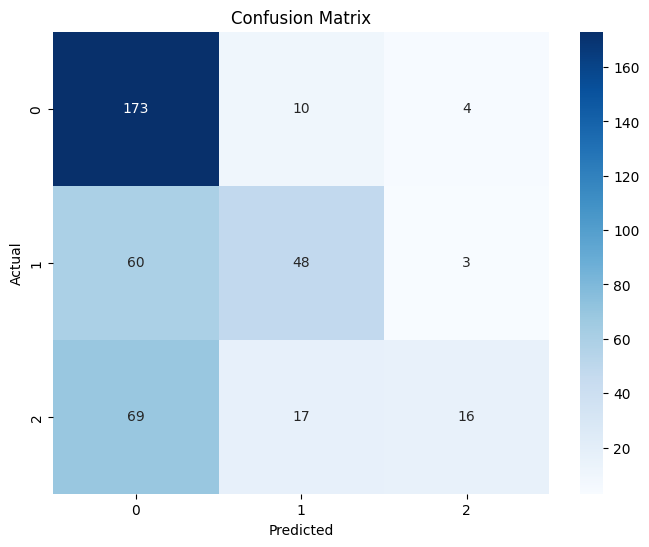

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
data = pd.read_csv("/content/genedataset.csv")

# Separate features and target
X = data.drop(columns=['target'])
y = data['target']

# Split into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Make predictions
y_pred = rf.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=rf.classes_, yticklabels=rf.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


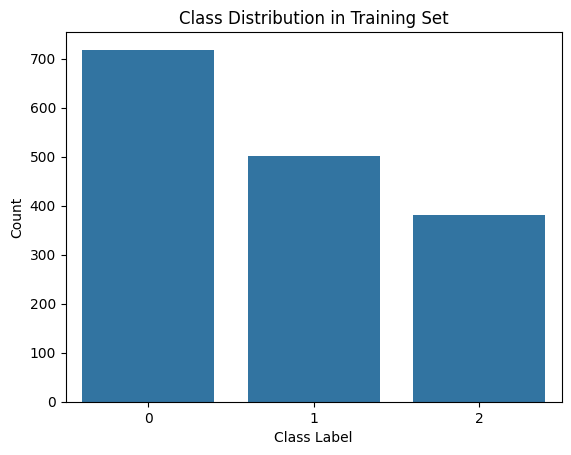

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=y_train)
plt.title("Class Distribution in Training Set")
plt.xlabel("Class Label")
plt.ylabel("Count")
plt.show()


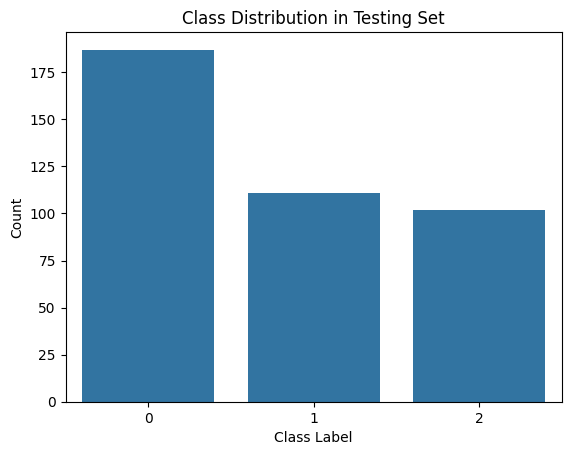

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=y_test)
plt.title("Class Distribution in Testing Set")
plt.xlabel("Class Label")
plt.ylabel("Count")
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, Input

In [ ]:
synthetic_data = pd.read_csv("/content/genedataset.csv")


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input

# Split real + synthetic data
X = synthetic_data.drop('target', axis=1)
y_synth = synthetic_data['target']

# Scale the entire dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Fit and transform on the entire dataset

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_synth, test_size=0.2, random_state=42)

# Reshape input for Conv1D
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input

# Split real + synthetic data
X = synthetic_data.drop('target', axis=1)
y_synth = synthetic_data['target']

# Scale the entire dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Fit and transform on the entire dataset

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_synth, test_size=0.2, random_state=42)

# Reshape input for Conv1D
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)



In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dropout, Flatten, Dense, Input
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.initializers import HeNormal
from sklearn.utils import class_weight

# Early stopping to monitor validation loss and restore best weights
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# CNN Model
model = Sequential([
    Input(shape=(X_train.shape[1], 1)),
    Conv1D(512, kernel_size=5, activation='relu', padding='same'),
    MaxPooling1D(pool_size=2),
    Dropout(0.5),

    Conv1D(256, kernel_size=5, activation='relu', padding='same'),
    MaxPooling1D(pool_size=2),
    Dropout(0.4),

    Conv1D(128, kernel_size=3, activation='relu', padding='same'),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),

    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(3, activation='softmax')
])


# Compile the model with Adam optimizer and sparse categorical crossentropy loss
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])



# Train the model with class weights
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=100,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1,
)

# Save the trained model
model.save("gene_expressioncnnmodel.keras")

# Show model summary for inspection
model.summary()


Epoch 1/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 10s 42ms/step - accuracy: 0.4326 - loss: 1.0742 - val_accuracy: 0.4400 - val_loss: 1.0678
Epoch 2/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.4368 - loss: 1.0678 - val_accuracy: 0.4100 - val_loss: 1.0809
Epoch 3/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.4571 - loss: 1.0519 - val_accuracy: 0.4225 - val_loss: 1.0776
Epoch 4/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.4435 - loss: 1.0645 - val_accuracy: 0.4450 - val_loss: 1.0664
Epoch 5/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.4723 - loss: 1.0388 - val_accuracy: 0.4675 - val_loss: 1.0661
Epoch 6/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.4766 - loss: 1.0493 - val_accuracy: 0.4200 - val_loss: 1.0730
Epoch 7/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.4802 - loss: 1.0391 - val_accuracy: 0.4475 - val_loss: 1.0720
Epoch 8/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.4550 - loss: 1.0564 - val_accuracy: 0

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 500, 512)       │         3,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 250, 512)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 250, 512)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 250, 256)       │       655,616 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 125, 256)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 125, 256)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 125, 128)       │        98,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 62, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 62, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 7936)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       507,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,795,851 (14.48 MB)

 Trainable params: 1,265,283 (4.83 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,530,568 (9.65 MB)

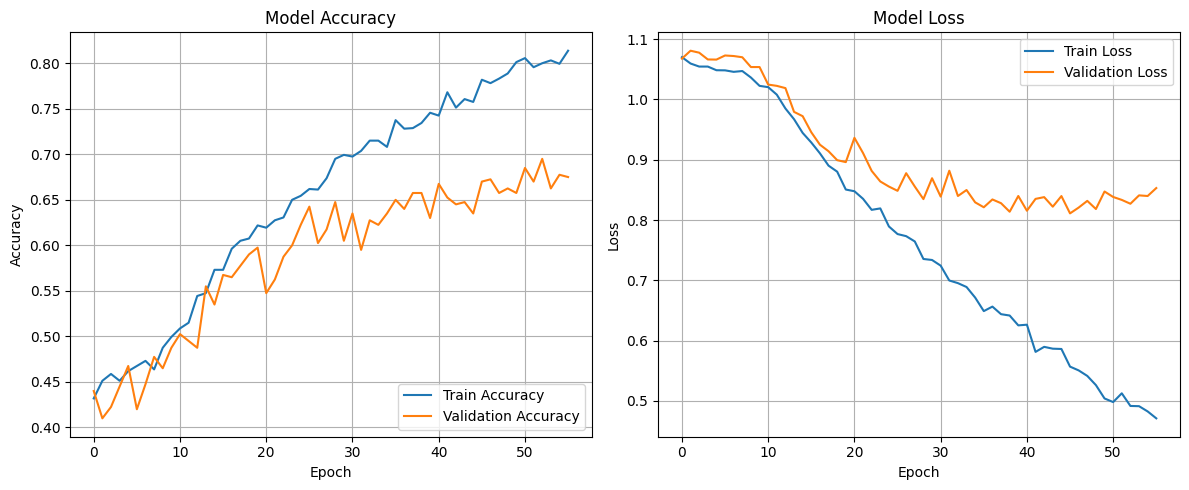

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid(True)

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
loss, acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {acc:.2f}, Test Loss: {loss:.2f}")


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6954 - loss: 0.7803
Test Accuracy: 0.67, Test Loss: 0.81


In [ ]:
loss, acc = model.evaluate(X_train, y_train)
print(f"Train Accuracy: {acc:.2f}, Test Loss: {loss:.2f}")


50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8662 - loss: 0.4102
Train Accuracy: 0.86, Test Loss: 0.42


# Quantization

# Post Training Quantization

In [ ]:
from tensorflow.keras.models import load_model

trained_model = load_model("/content/gene_expressioncnnmodel.keras")

trained_model.layers

[<Conv1D name=conv1d, built=True>,
 <MaxPooling1D name=max_pooling1d, built=True>,
 <Dropout name=dropout, built=True>,
 <Conv1D name=conv1d_1, built=True>,
 <MaxPooling1D name=max_pooling1d_1, built=True>,
 <Dropout name=dropout_1, built=True>,
 <Conv1D name=conv1d_2, built=True>,
 <MaxPooling1D name=max_pooling1d_2, built=True>,
 <Dropout name=dropout_2, built=True>,
 <Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dropout name=dropout_3, built=True>,
 <Dense name=dense_1, built=True>]

In [ ]:
total_no_layers = len(trained_model.layers)
print(total_no_layers)

13


In [ ]:
!pip install -U tensorflow-model-optimization


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.5/242.5 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 101.7 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.


In [ ]:
print(type(trained_model))



<class 'keras.src.models.sequential.Sequential'>


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import load_model

trained_model = load_model("/content/gene_expressioncnnmodel.keras")

converter = tf.lite.TFLiteConverter.from_keras_model(trained_model)
tflite_model = converter.convert()


Saved artifact at '/tmp/tmp92mj7wfz'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 500, 1), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 3), dtype=tf.float32, name=None)
Captures:
  132334924864336: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132334924865872: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132334924861648: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132334924867600: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132334924866448: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132334924868944: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132334924867024: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132334924870288: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132334924864720: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132334924871440: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [ ]:

# Save to file
with open("gene_expression_model.tflite", "wb") as f:
    f.write(tflite_model)

In [ ]:
len(tflite_model)

5067912

In [ ]:

converter = tf.lite.TFLiteConverter.from_keras_model(trained_model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quant_model = converter.convert()

Saved artifact at '/tmp/tmp504y0cam'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 500, 1), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 3), dtype=tf.float32, name=None)
Captures:
  132334924864336: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132334924865872: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132334924861648: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132334924867600: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132334924866448: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132334924868944: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132334924867024: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132334924870288: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132334924864720: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132334924871440: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [ ]:
len(tflite_quant_model )

1287176

In [ ]:

# Save to file
with open("gene_expression_model.tflite_quant_model", "wb") as f:
    f.write(tflite_quant_model )

In [ ]:
pip install flatbuffers


In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score
import tensorflow as tf


# Load the quantized TFLite model
interpreter = tf.lite.Interpreter(model_path="/content/gene_expression_model.tflite_quant_model")
interpreter.allocate_tensors()

# Get input and output tensor details
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Prepare test data (ensure correct shape, float32 type)
X_test_prepared = X_test.astype(np.float32)  # Convert to float32
if len(X_test_prepared.shape) == 2:
    X_test_prepared = np.expand_dims(X_test_prepared, axis=-1)

# List to store predictions
predictions = []

# Run inference on each test sample
for i in range(len(X_test_prepared)):
    input_data = np.expand_dims(X_test_prepared[i], axis=0)  # Shape: (1, length, 1)
    interpreter.set_tensor(input_details[0]['index'], input_data)
    interpreter.invoke()
    output = interpreter.get_tensor(output_details[0]['index'])
    pred_label = np.argmax(output)  # Get the class with highest probability
    predictions.append(pred_label)

# Calculate accuracy using sklearn's accuracy_score
accuracy = accuracy_score(y_test, predictions)
print(f"Post-Training Quantized Model Accuracy: {accuracy * 100:.2f}%")


Post-Training Quantized Model Accuracy: 67.75%


In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Number of classes
n_classes = 3

# One-hot encode the test labels
y_true = label_binarize(y_test, classes=[0, 1, 2])

# Predict probabilities
y_prob = model.predict(X_test)

# Calculate AUC for each class
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_true[:, i], y_prob[:, i])
    roc_auc = auc(fpr, tpr)
    print(f"AUC for class {i}: {roc_auc:.4f}")


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
AUC for class 0: 0.8391
AUC for class 1: 0.8193
AUC for class 2: 0.7952


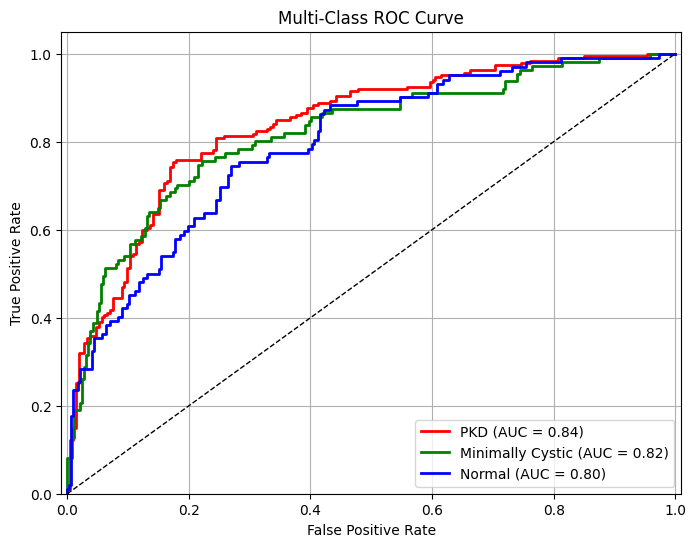

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Plot ROC curves for all classes
plt.figure(figsize=(8, 6))
colors = ['red', 'green', 'blue']
class_names = ['PKD', 'Minimally Cystic', 'Normal']  # Update with your label names

for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_true[:, i], y_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=colors[i], lw=2,
             label=f"{class_names[i]} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlim([-0.01, 1.01])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class ROC Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()
